Load Data 

In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 488 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

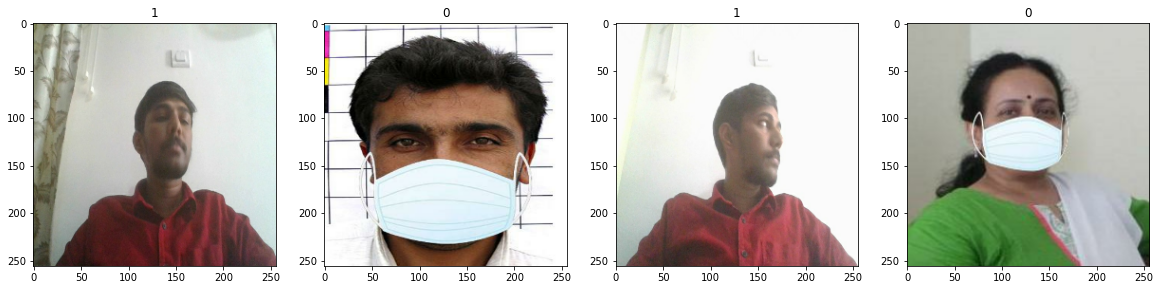

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [13]:
data = data.map(lambda x,y: (x/245, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[0.5408801 , 0.50140303, 0.48979592],
          [0.49107143, 0.4614796 , 0.39017856],
          [0.4489158 , 0.42646682, 0.29993623],
          ...,
          [0.82850766, 0.8758291 , 0.84757656],
          [0.83239794, 0.8640306 , 0.8308036 ],
          [0.8322066 , 0.8566964 , 0.8103954 ]],
 
         [[0.5476403 , 0.5121811 , 0.4723852 ],
          [0.47799745, 0.45140305, 0.36524233],
          [0.4602041 , 0.4397959 , 0.3112245 ],
          ...,
          [0.8535714 , 0.89713013, 0.8715561 ],
          [0.86211735, 0.8966199 , 0.8639668 ],
          [0.86358416, 0.8952806 , 0.85325253]],
 
         [[0.48692602, 0.45892859, 0.38297194],
          [0.47053573, 0.44706634, 0.34285715],
          [0.50357145, 0.48966837, 0.35899234],
          ...,
          [0.8611607 , 0.9119898 , 0.8859694 ],
          [0.86760205, 0.9128826 , 0.88156885],
          [0.8669005 , 0.90848213, 0.875     ]],
 
         ...,
 
         [[0.24228317, 0.2463648 , 0.22155613],
          [0.22646

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

11

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [18]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
11/11 [==============================] - 9s 776ms/step - loss: 0.7328 - accuracy: 0.6108 - val_loss: 0.5278 - val_accuracy: 0.6562
Epoch 2/10
11/11 [==============================] - 8s 688ms/step - loss: 0.3561 - accuracy: 0.8182 - val_loss: 0.1248 - val_accuracy: 0.9688
Epoch 3/10
11/11 [==============================] - 7s 620ms/step - loss: 0.1312 - accuracy: 0.9545 - val_loss: 0.1114 - val_accuracy: 0.9583
Epoch 4/10
11/11 [==============================] - 7s 596ms/step - loss: 0.0515 - accuracy: 0.9830 - val_loss: 0.0235 - val_accuracy: 1.0000
Epoch 5/10
11/11 [==============================] - 7s 647ms/step - loss: 0.0660 - accuracy: 0.9659 - val_loss: 0.0231 - val_accuracy: 0.9896
Epoch 6/10
11/11 [==============================] - 7s 582ms/step - loss: 0.0350 - accuracy: 0.9886 - val_loss: 0.0452 - val_accuracy: 1.0000
Epoch 7/10
11/11 [==============================] - 7s 600ms/step - loss: 0.0165 - accuracy: 0.9943 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 

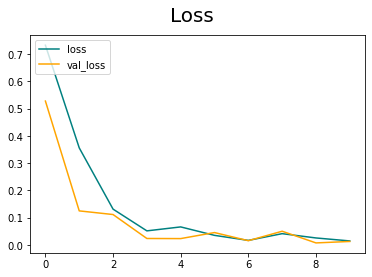

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

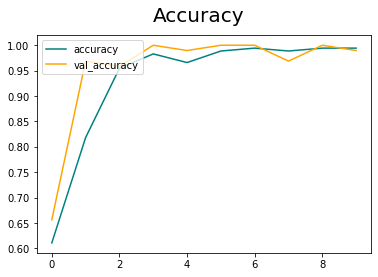

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [56]:
def ismask(yhat):
    if yhat < 0.01: 
        print(f'Predicted class is Mask')
    else:
        print(f'Predicted class is no Mask')

## Test

In [57]:
img = cv2.imread('with_mask.jpeg')

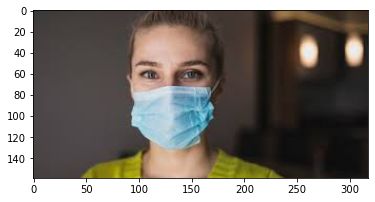

In [58]:
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

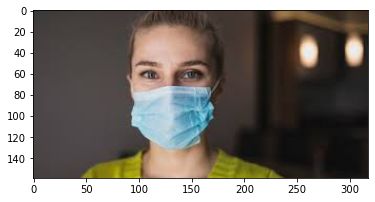

In [59]:
plt.imshow(img)

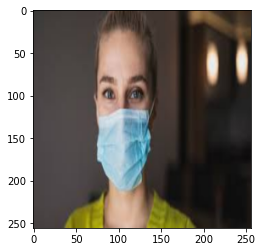

In [60]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [61]:
yhat = model.predict(np.expand_dims(resize/256, 0))

In [62]:
yhat

array([[0.001562]], dtype=float32)

In [63]:
ismask(yhat)

Predicted class is Mask


TEST WITHOUT MASK

In [64]:
img = cv2.imread('without_mask.jpeg')

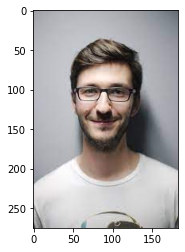

In [65]:
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

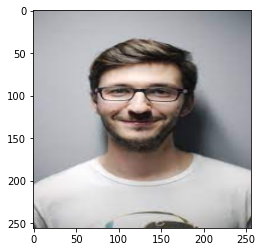

In [66]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [67]:
hat = model.predict(np.expand_dims(resize/256, 0))

In [68]:
hat

array([[0.2775098]], dtype=float32)

In [69]:
ismask(hat)

Predicted class is no Mask
